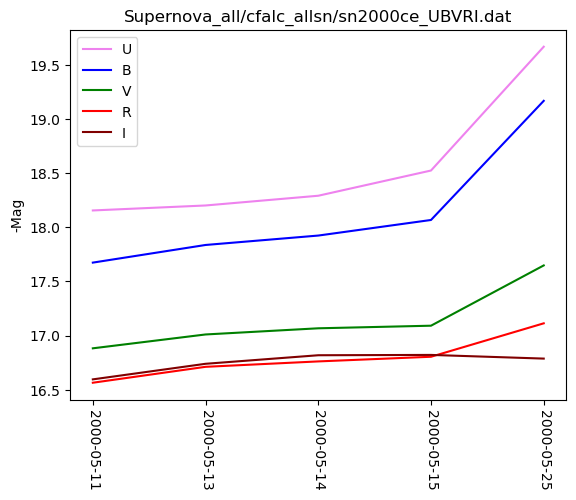

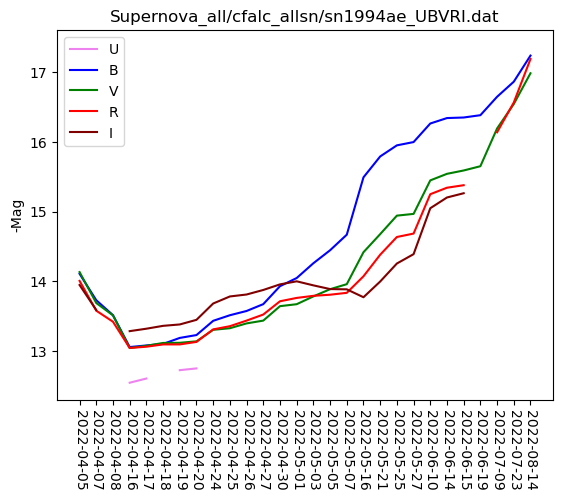

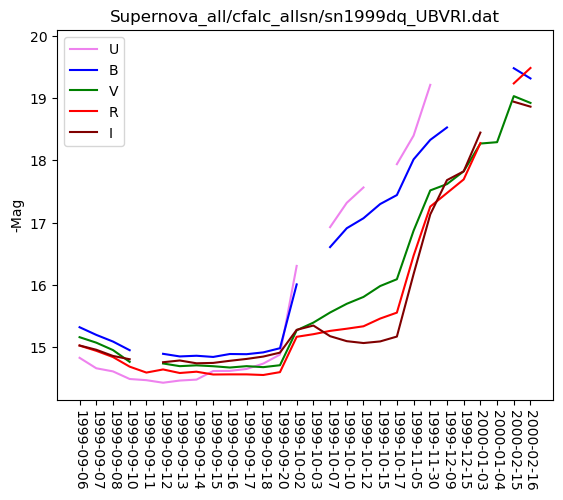

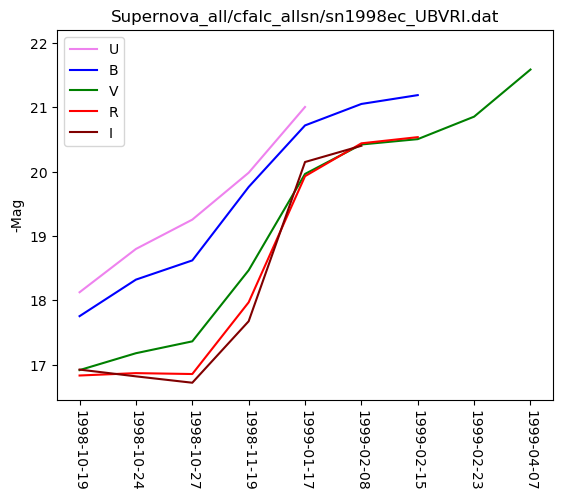

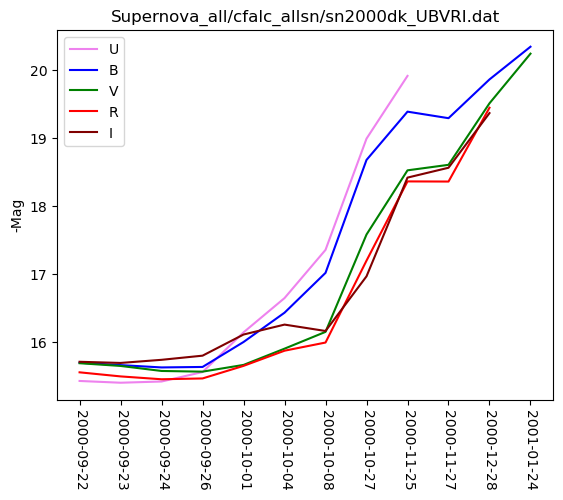

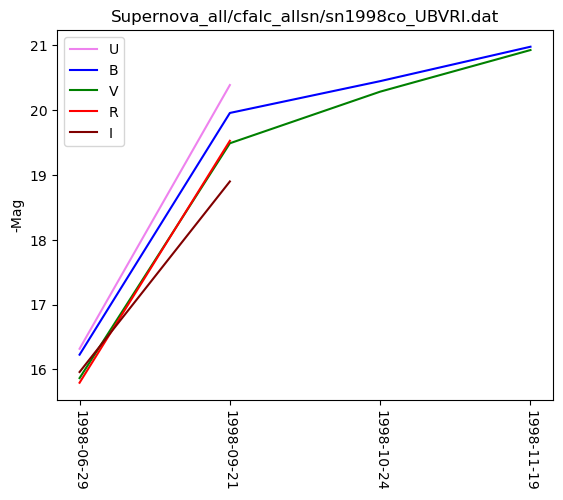

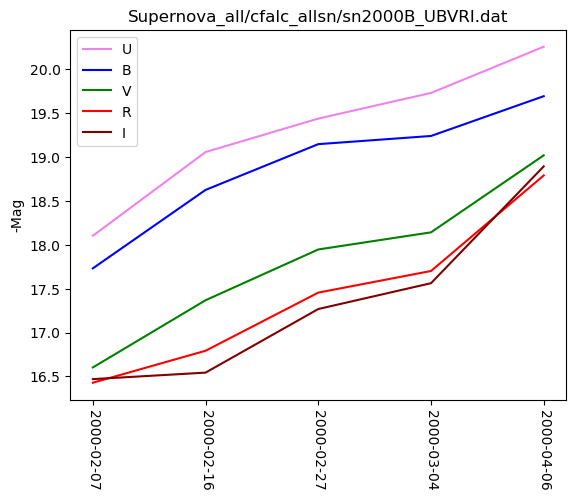

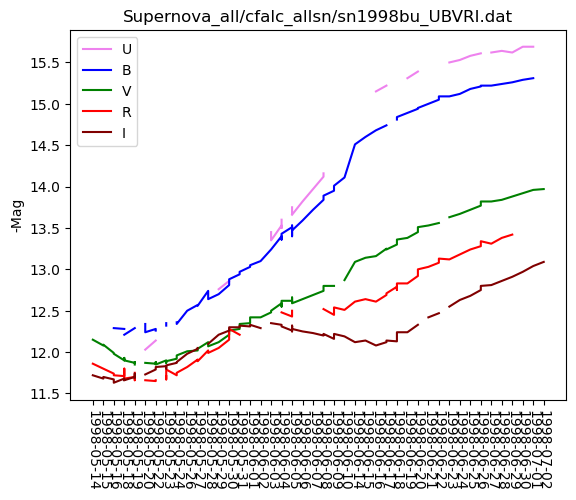

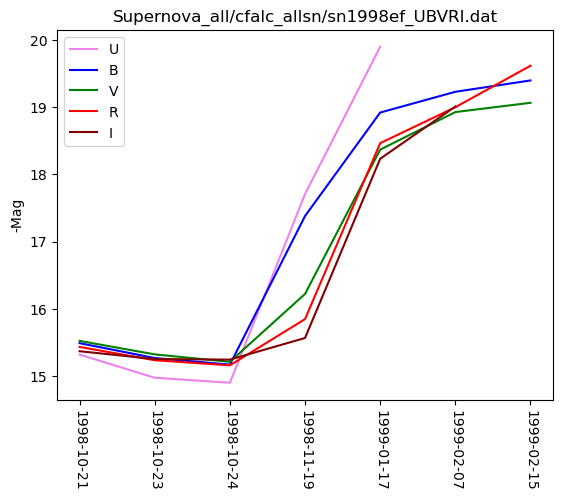

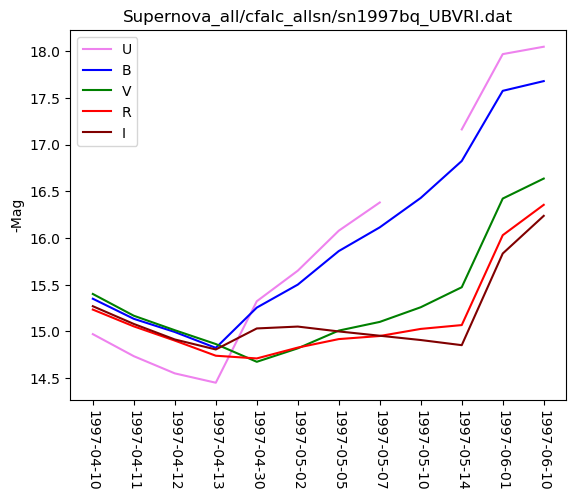

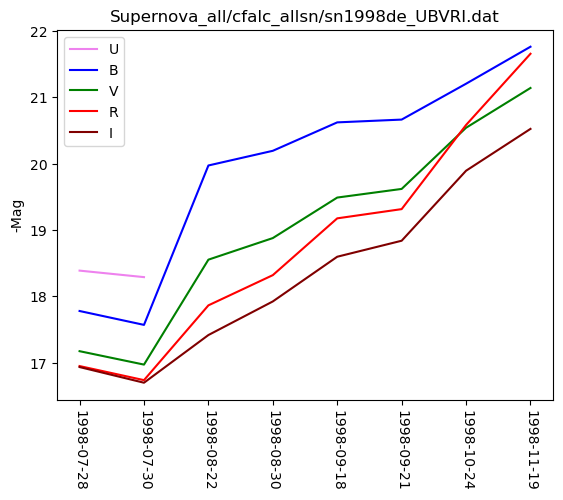

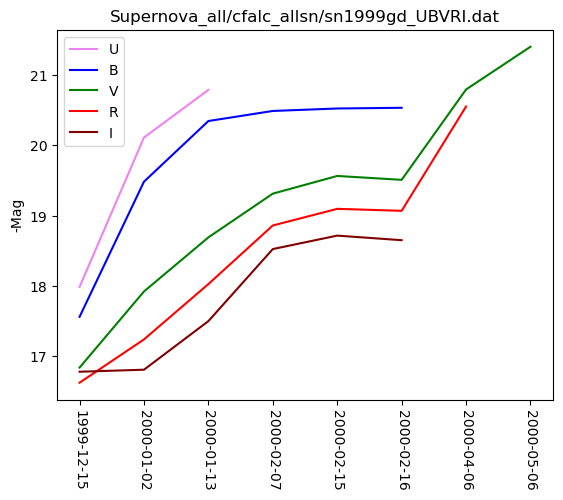

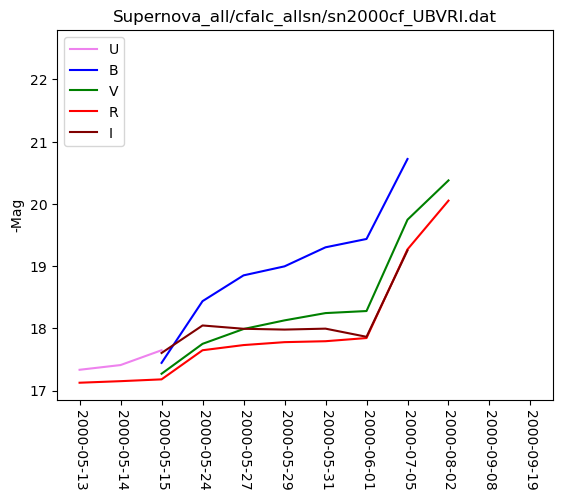

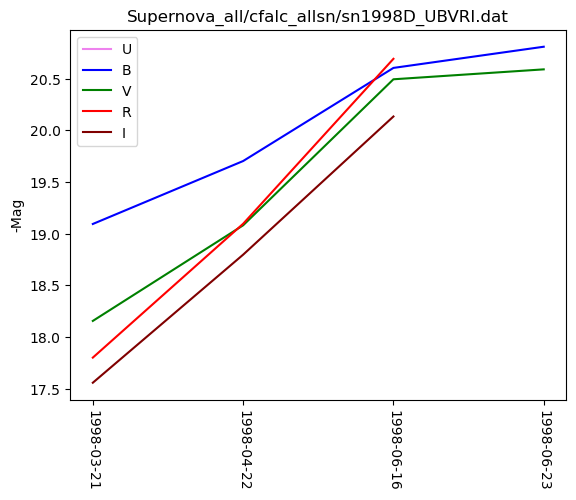

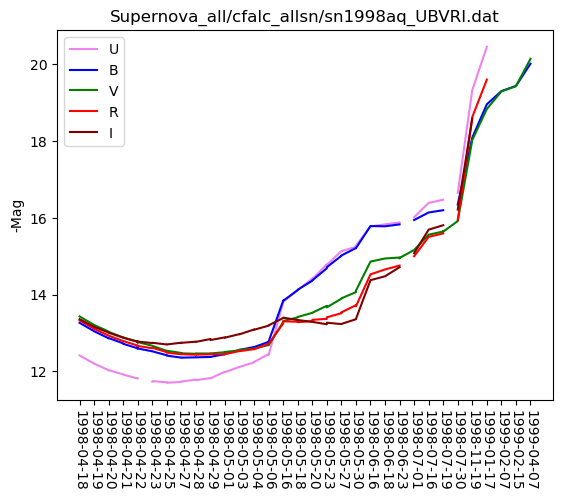

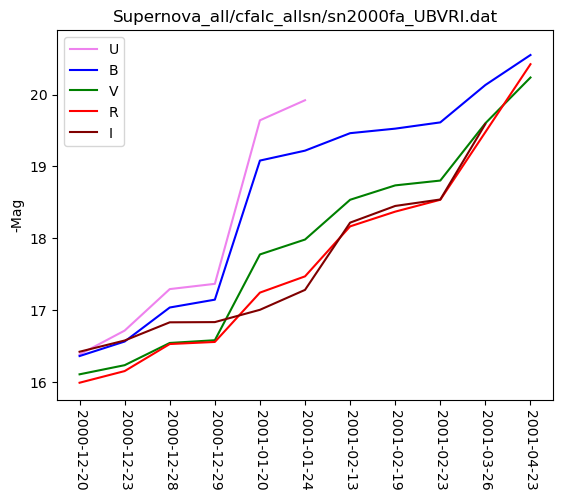

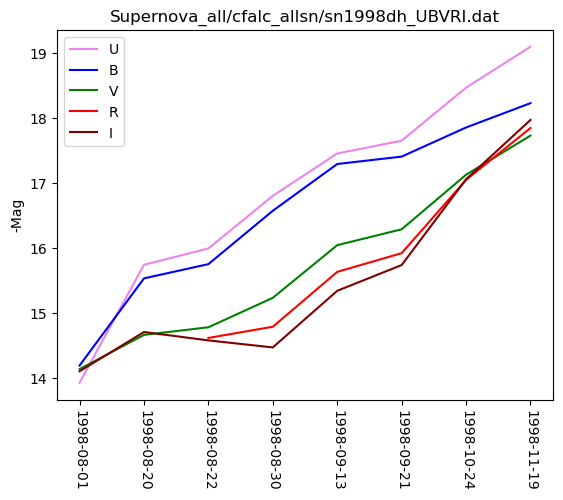

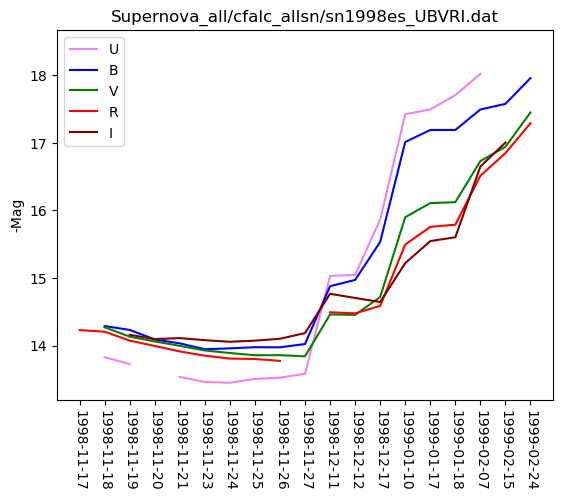

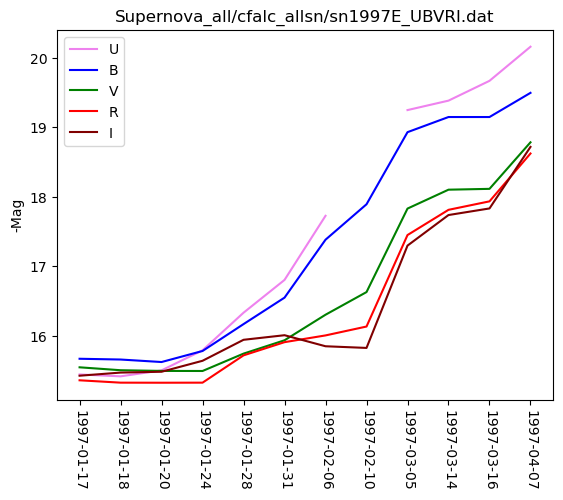

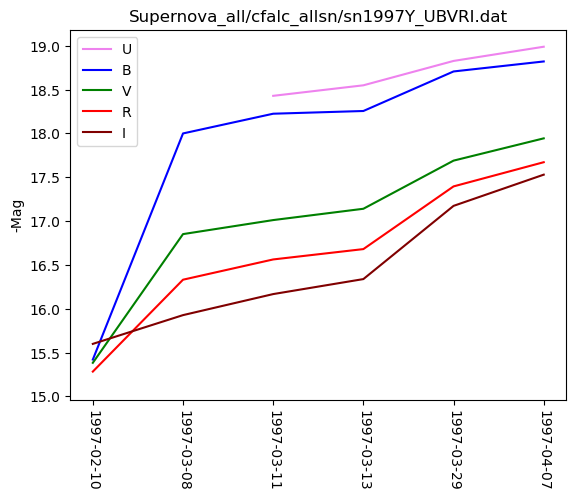

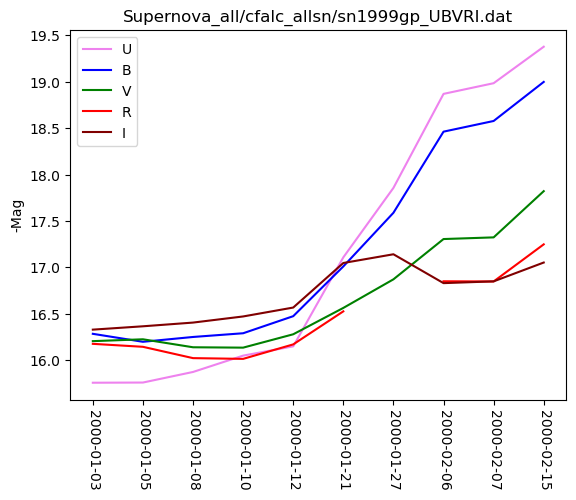

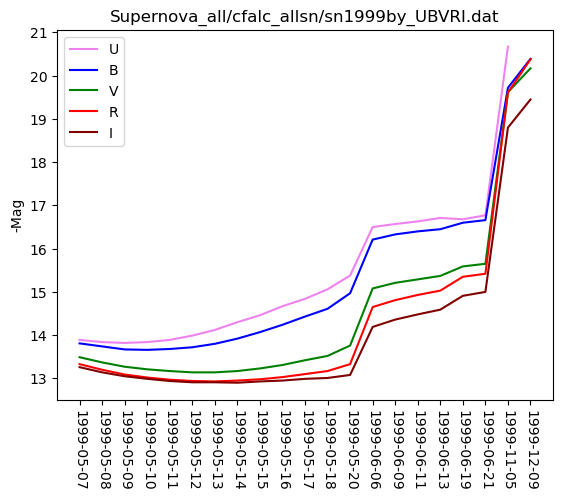

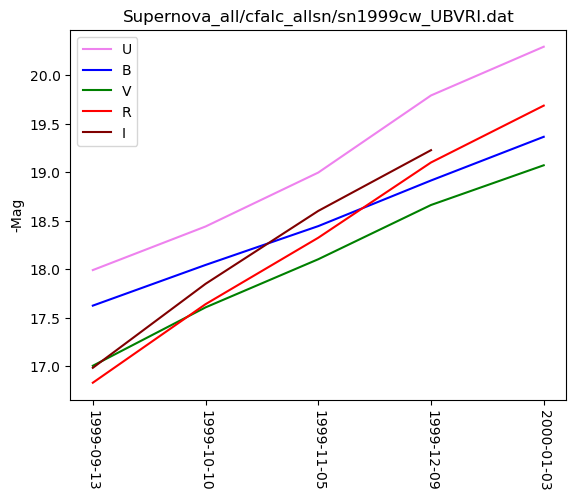

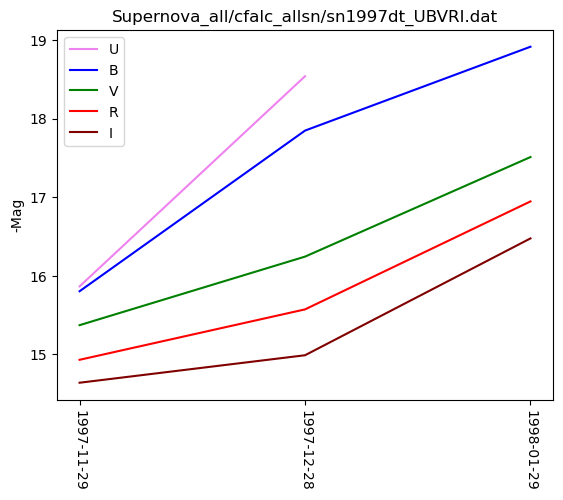

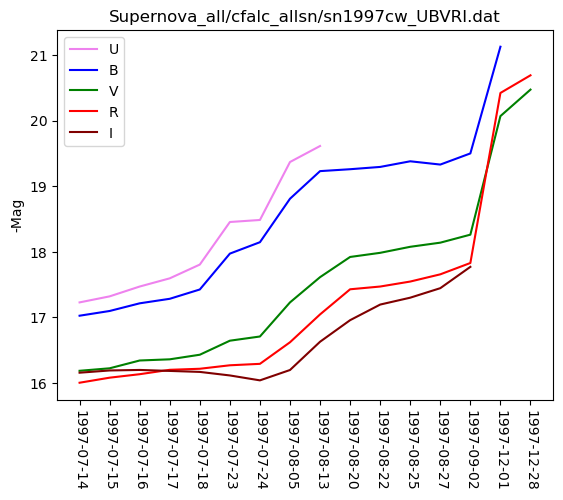

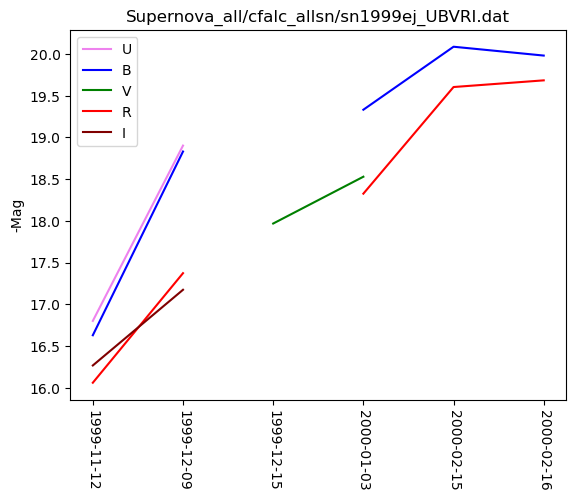

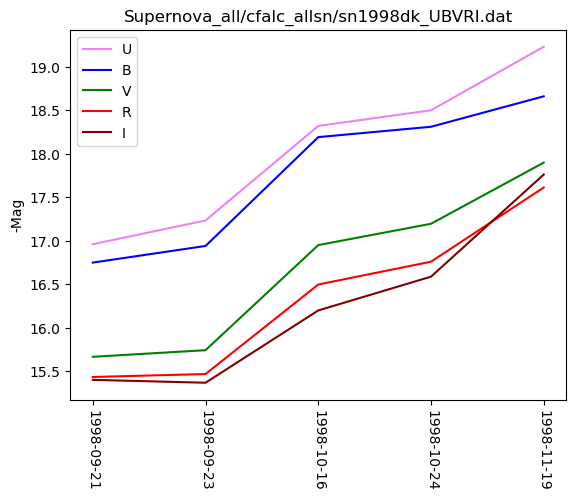

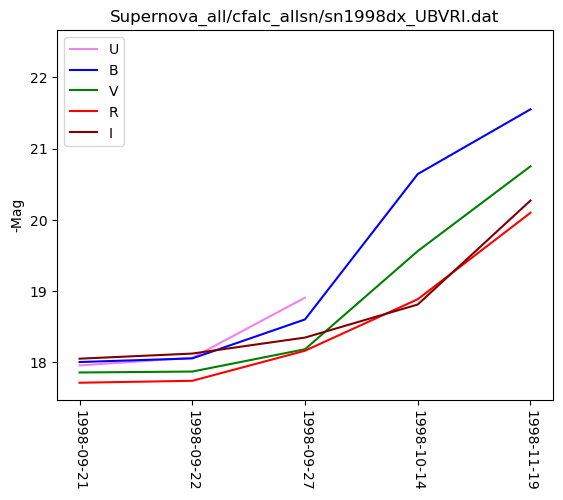

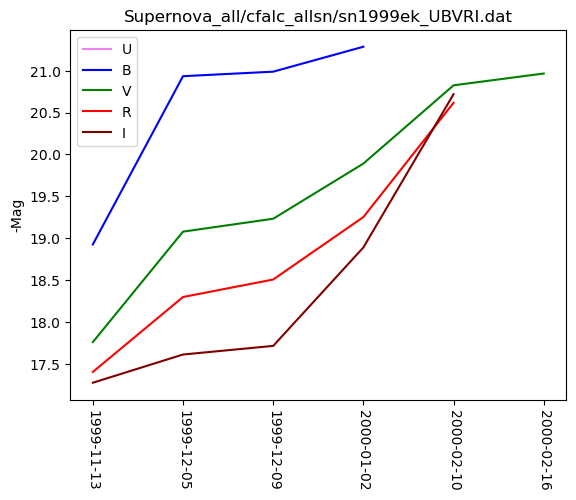

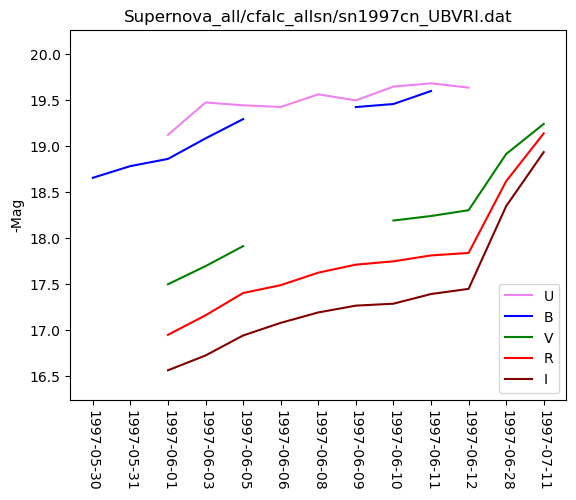

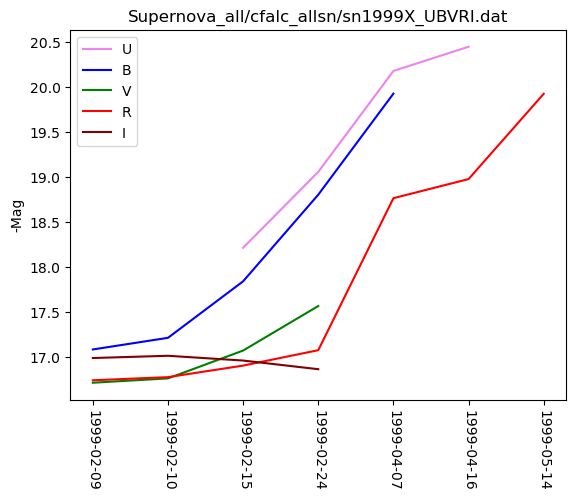

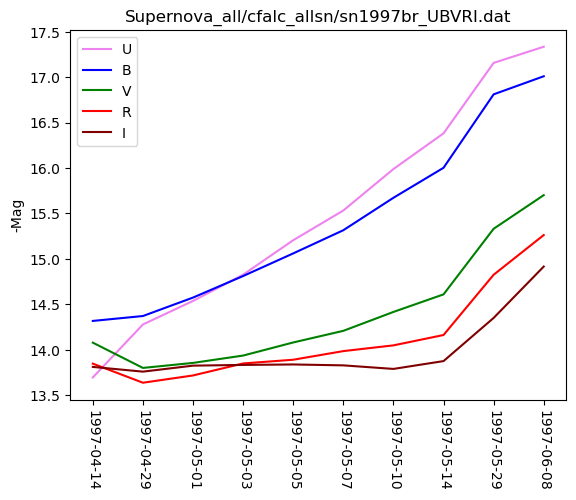

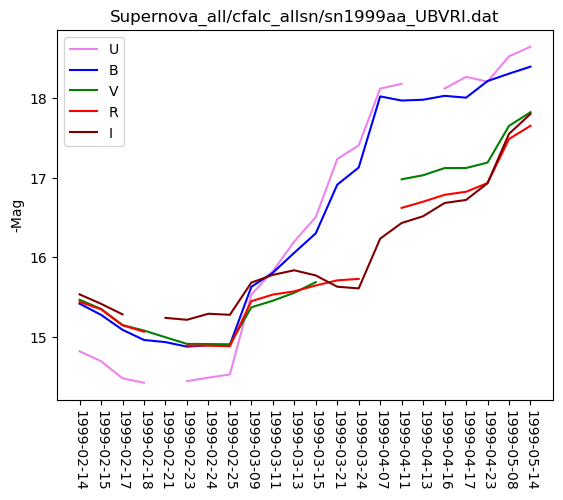

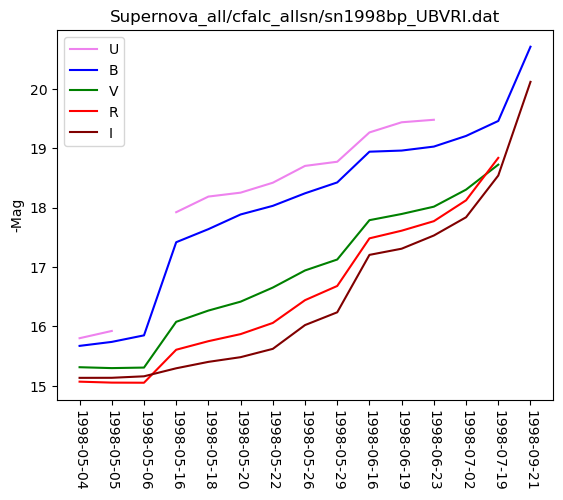

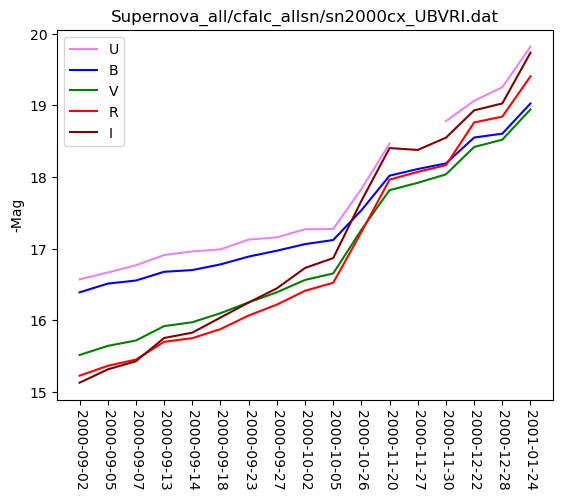

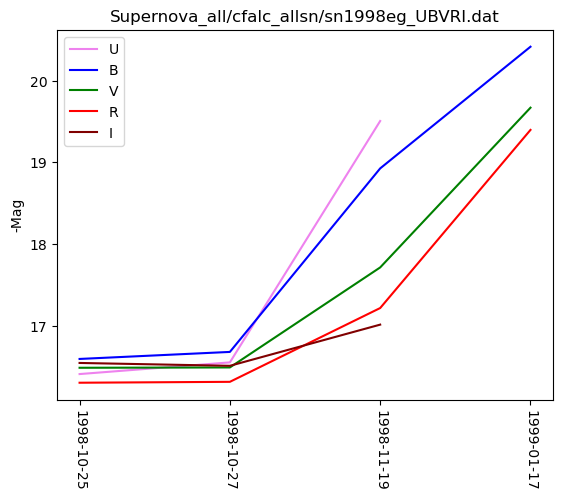

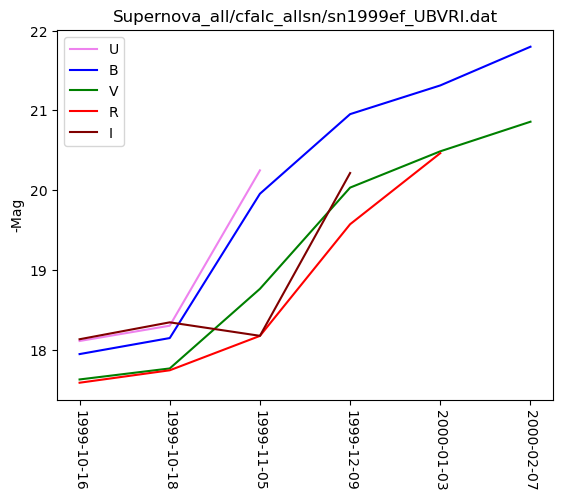

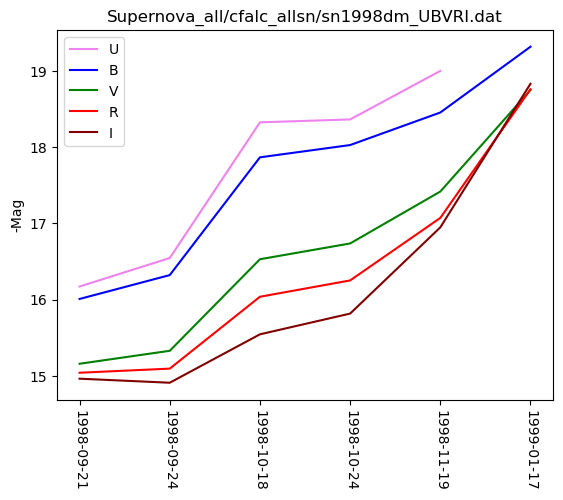

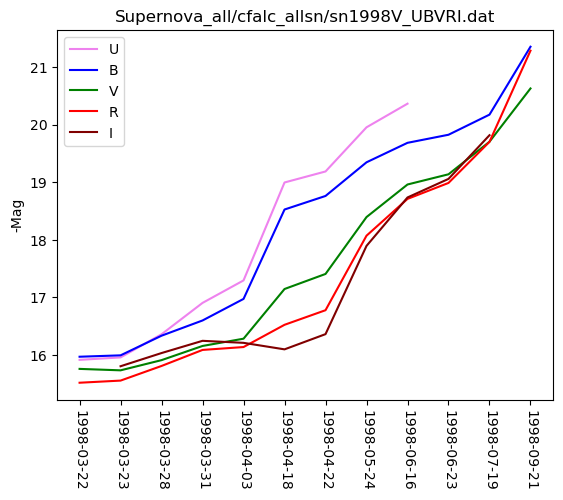

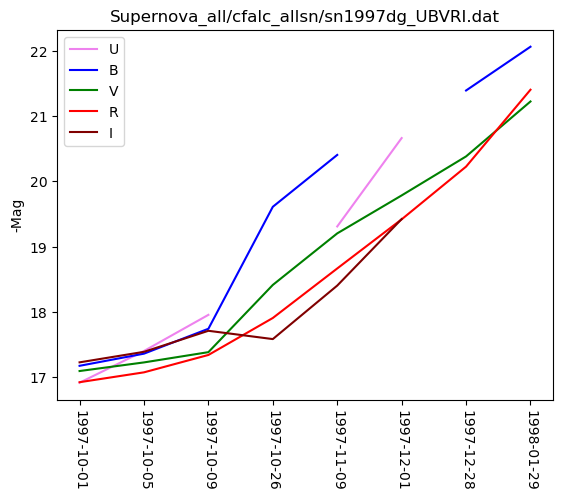

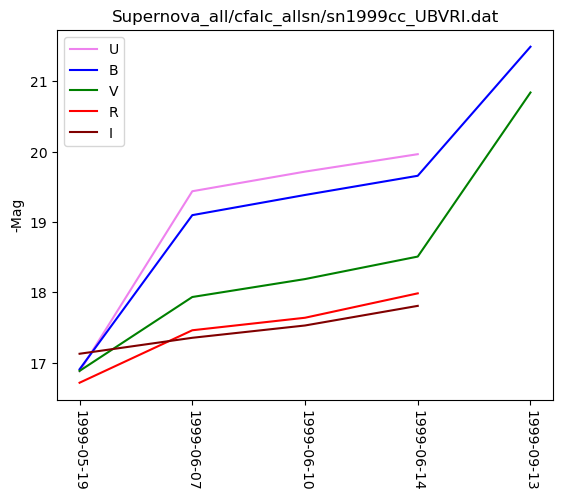

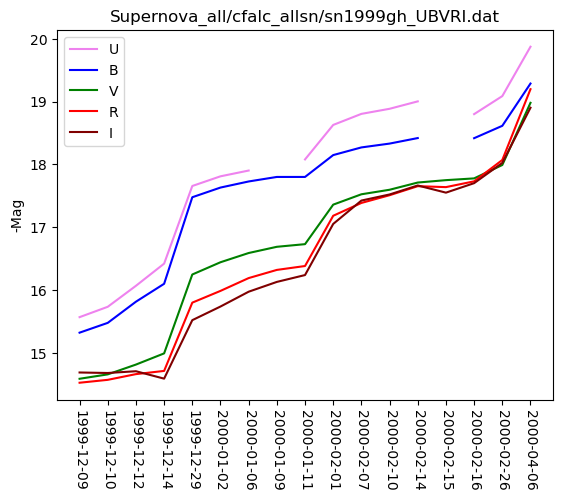

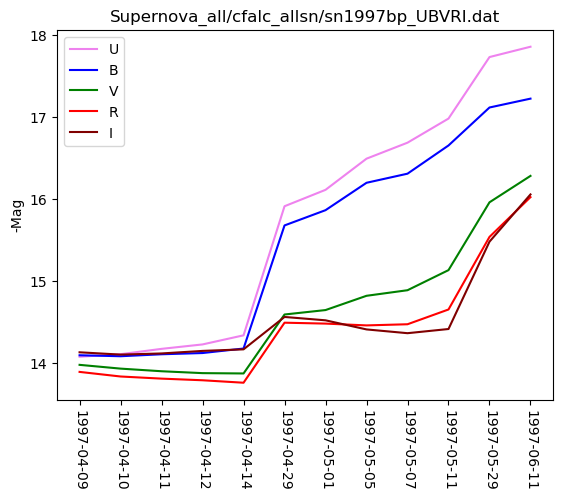

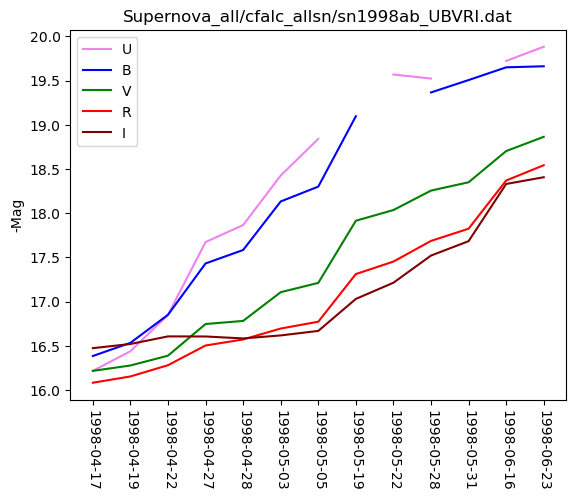

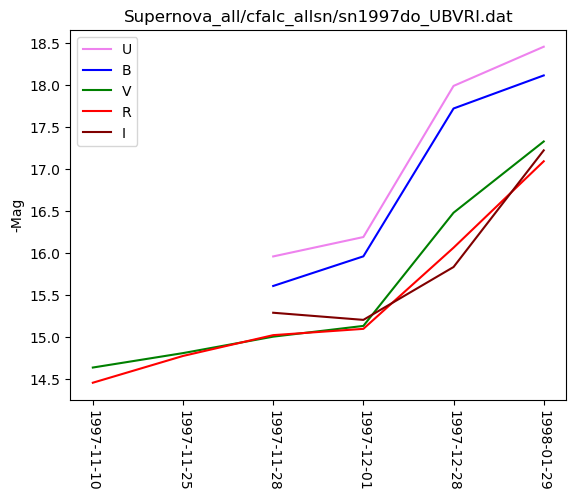

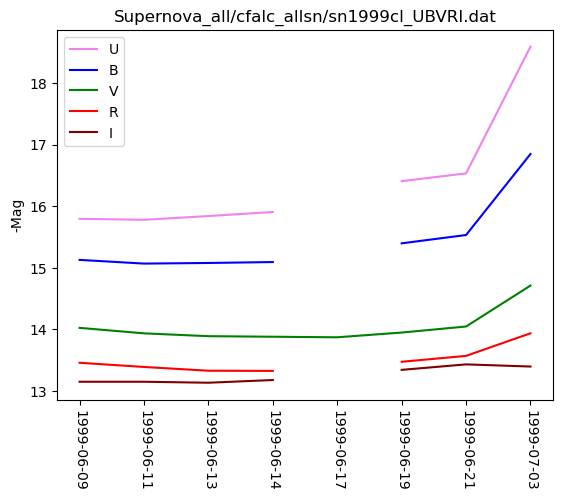

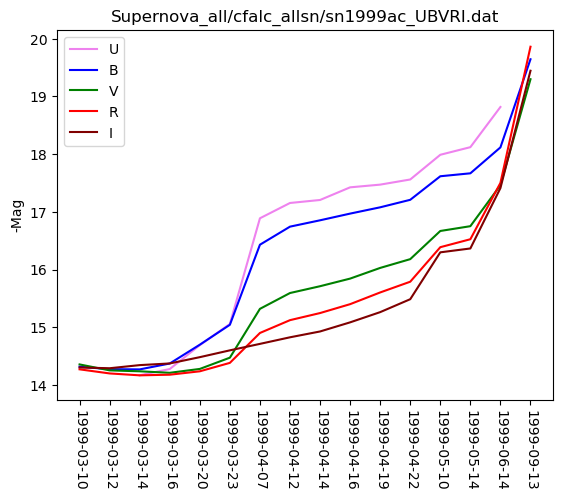

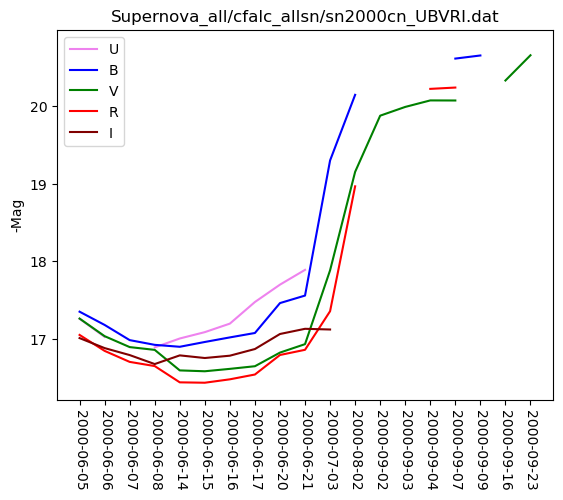

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time

for file in glob.glob( "Supernova_all/cfalc_allsn/*_UBVRI.dat" ):
  try:
    df= pd.read_table( file, comment="#", sep="[ \t]+", engine="python", header=0, names=["HJD","U","Uerr","B","Berr","V","Verr","R","Rerr","I","Ierr"] )
    df[df == 99.999]= float( "NaN" )
    df[df == 99.99]= float( "NaN" )
    if df["HJD"].iat[0] < 2450000:
      df["HJD"]+= 2450000
    for i in df["HJD"].index:
      df["HJD"].iat[i]= Time(df["HJD"].iat[i], format='jd', scale='utc').iso[0:10]
    for filter, color in [["U","violet"],["B","blue"],["V","green"],["R","red"],["I","#800000"]]:
      plt.plot( df["HJD"].values, df[filter].values, label=filter, color=color )
    plt.title( file )
    #plt.xlabel( "HJD" )
    plt.ylabel( "-Mag" )
    plt.legend()
    plt.xticks( rotation=270 )
    plt.show()
  except:
    print( file, "ignored" )
